# 1D Linear Elastic Bar (Axial Deformation)

- A 1D bar of length $L$ fixed on the ceiling.
- Subject to the gravitational force on the free end.
- Discretized using the finite element method (FEM) with linear elements.

## Governing equation:

$$
- \frac{d}{dz} \left( E \frac{du}{dz} \right) = \rho g
$$

Where:

* $u(z)$: axial displacement
* $E$: Young’s modulus
* $g$: Mean gravitational acceleration
* $\rho$: Density


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0         # Length of the bar [m]
n = 10          # Number of elements
E = 200e9       # Young's modulus [Pa]
g = 9.81        # Mean gravitational acceleration on earth [m/s^2]
rho = 8e3       # Density [kg/m^3]

# Discretization
def create_mesh(n, L):
    nodes = np.linspace(0, L, n + 1)
    h = L / n
    return nodes, h

# Assemble stiffness matrix (linear FEM)
def assemble_stiffness_matrix(n, h, rho, g, E):
    a = np.ones((1, n + 1))[0]
    b = np.ones((1, n))[0]
    K = -2 * np.diag(a, 0) + np.diag(b, -1) + np.diag(b, 1)
    K[0, 0] = K[-1, -1] = -1
    K *= -E / h
    F = 2 * np.ones(n + 1)
    F[0] = F[-1] = 1
    F *= rho * g * h / 2
    return K, F

# Apply Dirichlet BC: u(0) = 0
def apply_boundary_conditions(K, F):
    K[0, :] = 0
    K[0, 0] = 1
    F[0] = 0
    return K, F

def solve_equation(K, F):
    return np.linalg.solve(K, F)


# Plot displacement
def plot_results(nodes, u):
    plt.plot(nodes, u, marker='o')
    plt.xlabel('x [m]')
    plt.ylabel('Displacement u(x) [m]')
    plt.title('Axial Displacement of a 1D Bar')
    plt.grid(True)
    return plt


<module 'matplotlib.pyplot' from '/home/jovyan/conda/lib/python3.12/site-packages/matplotlib/pyplot.py'>

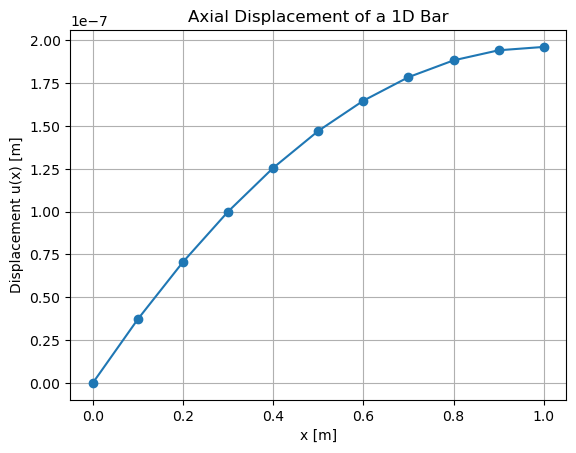

In [2]:
nodes, h = create_mesh(n=n, L=L)
K, F = assemble_stiffness_matrix(n=n, h=h, rho=rho, g=g, E=E)
K, F = apply_boundary_conditions(K=K, F=F)
u = solve_equation(K=K, F=F)
plot_results(nodes=nodes, u=u)